In [2]:
import os 
import csv 
import glob 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
autoregress_savepath = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix_sep2vec/exp/20240630_mixloss_autoregression_fixed_pretrained_16sample_50epochcircle/epoch349_randomseed2203"
original_savepath = "/data1/wangyiwen/repos/graduateproject/speakerbeam/egs/libri2mix/exp/20240629_mixloss/out_forward_streaming_ddp_random_seed_2203"

In [4]:
def load_info(savepath):
    csv_paths = glob.glob(os.path.join(savepath, "all_metrics_rank*.csv"))
    key2matric = {}
    for csv_path in csv_paths:
        try:
            csv_info = pd.read_csv(csv_path)
            # read the csv information with input_si_sdr, stoi, sdr information
            # read from the second line
            input_si_sdr = csv_info['input_si_sdr']
            output_si_sdr = csv_info['si_sdr']
            stoi = csv_info['stoi']
            mix_path = csv_info['mix_path']
            for i in range(len(input_si_sdr)):
                key2matric[mix_path[i]] = [input_si_sdr[i], output_si_sdr[i], stoi[i]]
        except:
            print("error in reading csv file", csv_path)
    return key2matric
# load_info(autoregress_savepath) 

In [25]:
auto_regress_metrics = load_info(autoregress_savepath)
original_metrics = load_info(original_savepath)
keys = auto_regress_metrics.keys()
# print(auto_regress_metrics[auto_regress_metrics.keys()])

In [45]:
key_input_si_sdr_orig = dict({})
key_input_si_sdr_regress = dict({})
for key in auto_regress_metrics.keys():
    int_sisdr = int(auto_regress_metrics[key][0])
    if int_sisdr not in key_input_si_sdr_regress:
        key_input_si_sdr_regress[int_sisdr] = []
    key_input_si_sdr_regress[int_sisdr].append(auto_regress_metrics[key][2])
    int_sisdr = int(original_metrics[key][0])
    if int_sisdr not in key_input_si_sdr_orig:
        key_input_si_sdr_orig[int_sisdr] = []
    key_input_si_sdr_orig[int_sisdr].append(original_metrics[key][2])
        

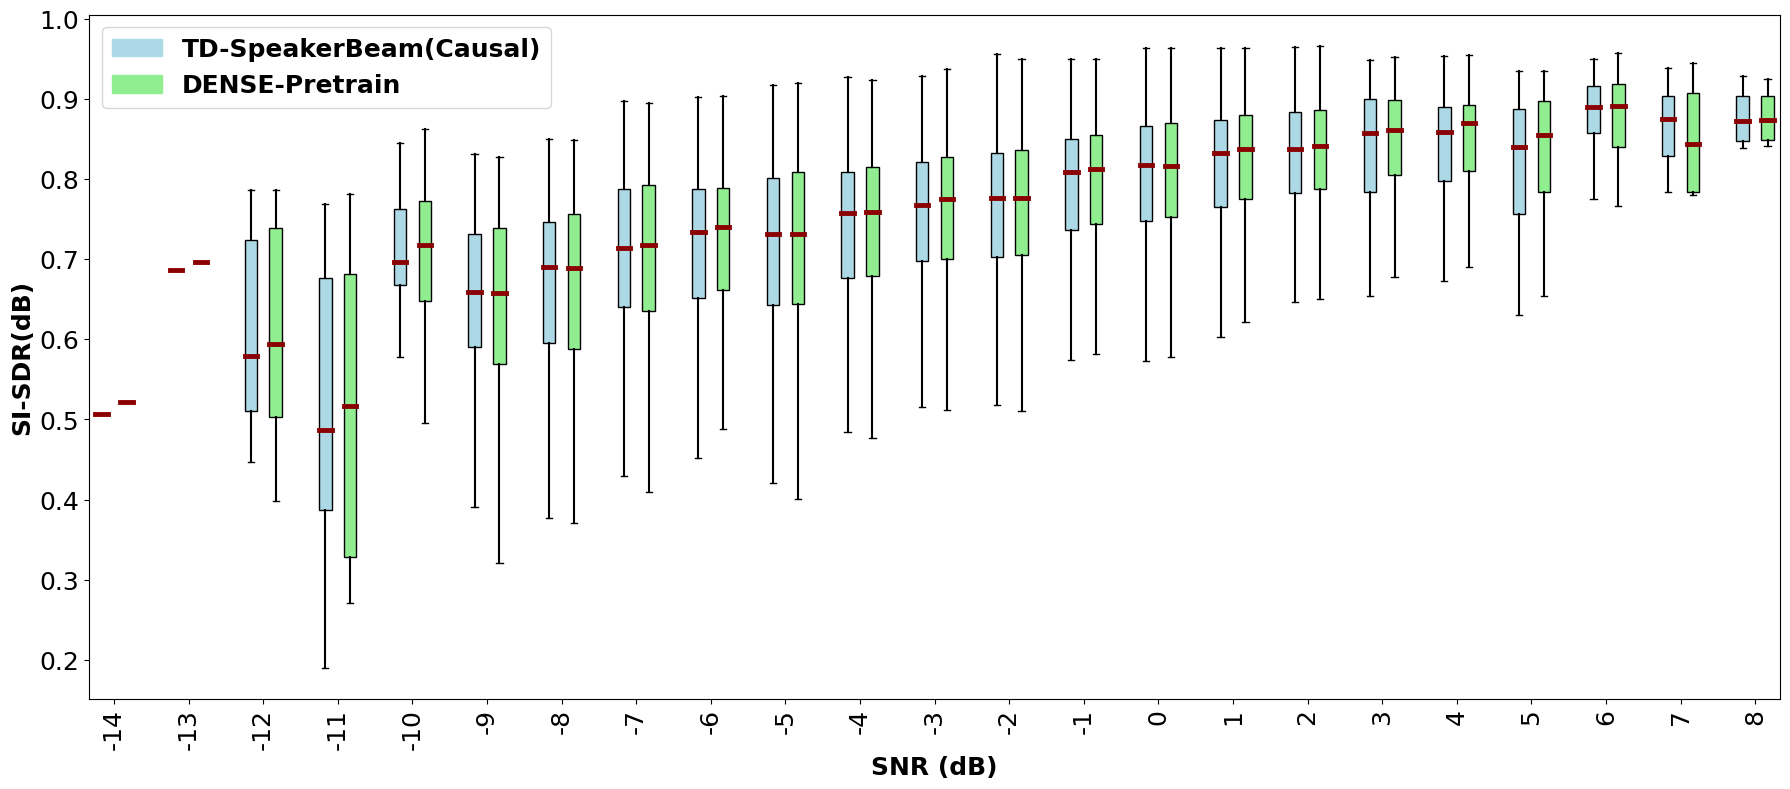

In [46]:
# plot the figure import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
snr_key = list(key_input_si_sdr_orig.keys())
# snr_key = np.arange(-8, 9, 1)
snr_key.sort()
plt.figure(figsize=(18, 8))
data = []
positions = []
labels = []
colors = []
for i, key in enumerate(snr_key):
    positions.append(i*3+1)
    positions.append(i*3+2)
    data.append(key_input_si_sdr_orig[key])
    data.append(key_input_si_sdr_regress[key])
    labels.append(f"{key}dB")
    labels.append(f"{key}dB")
    colors.append('lightblue')
    colors.append('lightgreen')
plt_box = plt.boxplot(data,  positions=positions, labels=labels, showfliers=False, patch_artist=True)

# for patch, color in zip(plt_box['boxes'], colors):
#     patch.set_facecolor(color)

# from matplotlib import font_manager as fm
# font_prop = fm.FontProperties(family='DejaVu Sans', size=18, weight='bold')

# # plt.title('STOI Results Distribution for Different SNRs')
# plt.xlabel('SNR (dB)', fontproperties=font_prop)
# plt.ylabel('STOI', fontproperties=font_prop)
# # 旋转横坐标标签以便阅读
# plt.xticks(ticks=[i * 3 + 1.5 for i in range(len(snr_key))], labels=snr_key, rotation=90, fontsize=18)
# plt.yticks(fontsize=18)

# blue_patch = mpatches.Patch(color='lightblue', label='Original')
# green_patch = mpatches.Patch(color='lightgreen', label='AutoRegressive')
# plt.legend(handles=[blue_patch, green_patch], prop=font_prop)

# 调整箱体颜色
for patch, color in zip(plt_box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')  # 箱体边框颜色

# 调整须线的颜色
for whisker in plt_box['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)

# 调整中位数线的颜色和宽度
for median in plt_box['medians']:
    median.set_color('darkred')  # 使用更深的颜色
    median.set_linewidth(3.5)  # 增加线宽

from matplotlib import font_manager as fm
font_prop = fm.FontProperties(family='DejaVu Sans', size=18, weight='bold')

# plt.title('SI-SDR Results Distribution for Different SNRs')
plt.xlabel('SNR (dB)', fontproperties=font_prop)
plt.ylabel('SI-SDR(dB)', fontproperties=font_prop)
# 旋转横坐标标签以便阅读
plt.xticks(ticks=[i * 3 + 1.5 for i in range(len(snr_key))], labels=snr_key, rotation=90, fontsize=18)
plt.yticks(fontsize=18)

blue_patch = mpatches.Patch(color='lightblue', label='TD-SpeakerBeam(Causal)')
green_patch = mpatches.Patch(color='lightgreen', label='DENSE-Pretrain')
plt.legend(handles=[blue_patch, green_patch], prop=font_prop)

# 显示图形
plt.tight_layout()
plt.show()

In [37]:
key_input_si_sdr_orig = dict({})
key_input_si_sdr_regress = dict({})
for key in auto_regress_metrics.keys():
    int_sisdr = int(auto_regress_metrics[key][0])
    if int_sisdr not in key_input_si_sdr_regress:
        key_input_si_sdr_regress[int_sisdr] = []
    key_input_si_sdr_regress[int_sisdr].append(auto_regress_metrics[key][1])
    int_sisdr = int(original_metrics[key][0])
    if int_sisdr not in key_input_si_sdr_orig:
        key_input_si_sdr_orig[int_sisdr] = []
    key_input_si_sdr_orig[int_sisdr].append(original_metrics[key][1])
        

In [12]:
import matplotlib.font_manager as fm

# 列出系统中的所有字体
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())

DejaVu Serif
DejaVu Sans Mono
DejaVu Sans
DejaVu Sans
DejaVu Serif
DejaVu Sans Mono


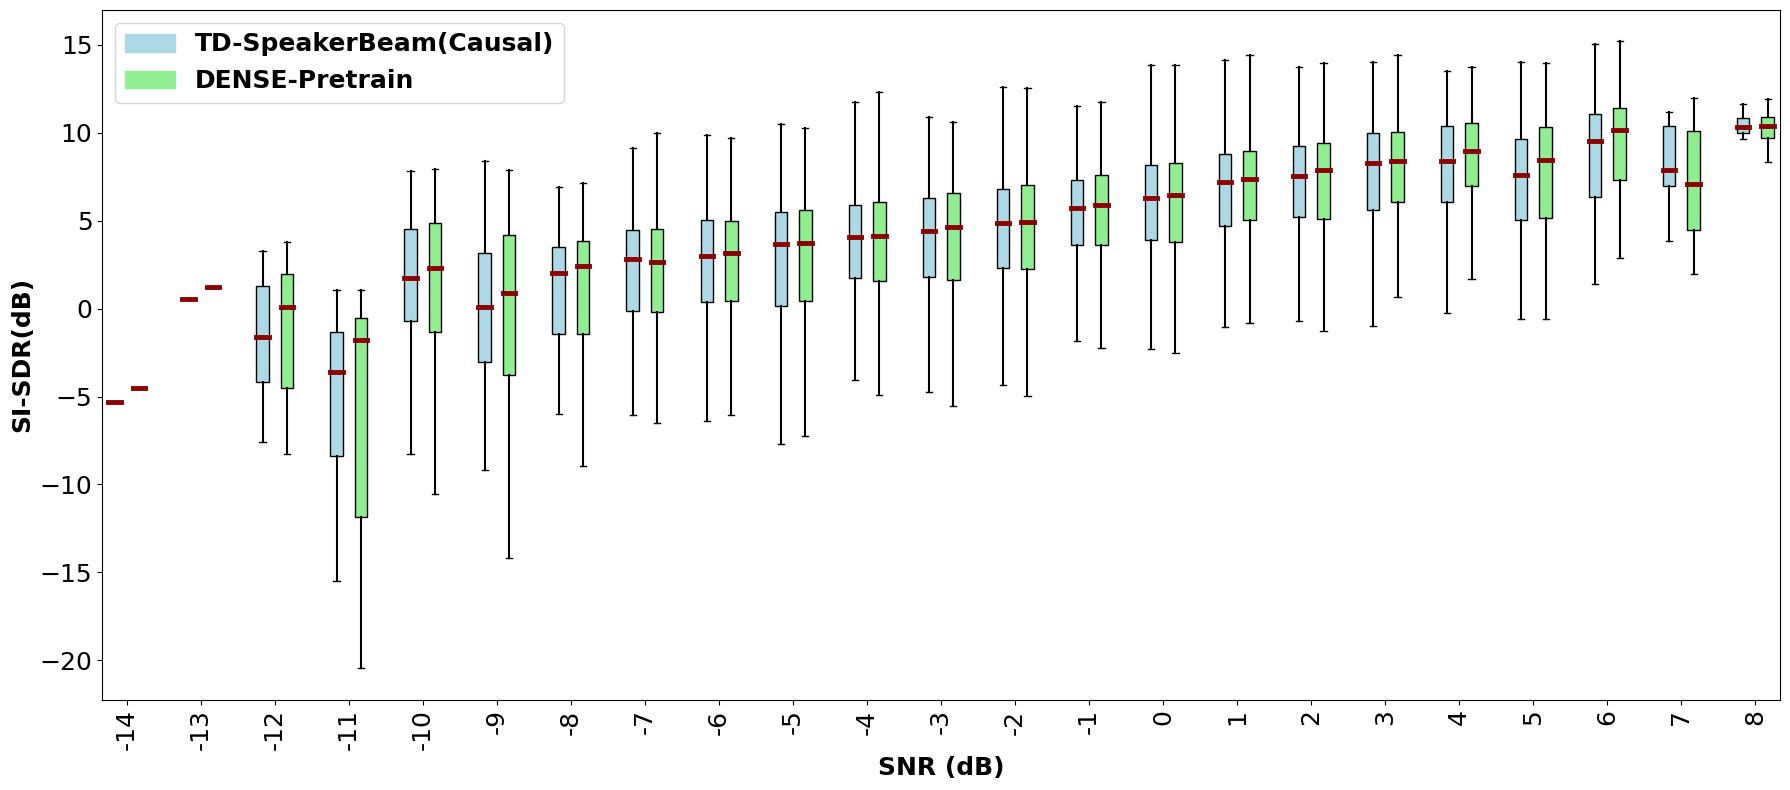

In [44]:
# plot the figure import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
snr_key = list(key_input_si_sdr_orig.keys())
# snr_key = np.arange(-8, 9, 1)
snr_key.sort()
plt.figure(figsize=(18, 8))
data = []
positions = []
labels = []
colors = []
for i, key in enumerate(snr_key):
    positions.append(i*3+1)
    positions.append(i*3+2)
    data.append(key_input_si_sdr_orig[key])
    data.append(key_input_si_sdr_regress[key])
    labels.append(f"{key}dB")
    labels.append(f"{key}dB")
    colors.append('lightblue')
    colors.append('lightgreen')
plt_box = plt.boxplot(data,  positions=positions, labels=labels, showfliers=False, patch_artist=True)

# for patch, color in zip(plt_box['boxes'], colors):
    # patch.set_facecolor(color)
    
# 调整箱体颜色
for patch, color in zip(plt_box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')  # 箱体边框颜色

# 调整须线的颜色
for whisker in plt_box['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)

# 调整中位数线的颜色和宽度
for median in plt_box['medians']:
    median.set_color('darkred')  # 使用更深的颜色
    median.set_linewidth(3.5)  # 增加线宽

from matplotlib import font_manager as fm
font_prop = fm.FontProperties(family='DejaVu Sans', size=18, weight='bold')

# plt.title('SI-SDR Results Distribution for Different SNRs')
plt.xlabel('SNR (dB)', fontproperties=font_prop)
plt.ylabel('SI-SDR(dB)', fontproperties=font_prop)
# 旋转横坐标标签以便阅读
plt.xticks(ticks=[i * 3 + 1.5 for i in range(len(snr_key))], labels=snr_key, rotation=90, fontsize=18)
plt.yticks(fontsize=18)

blue_patch = mpatches.Patch(color='lightblue', label='TD-SpeakerBeam(Causal)')
green_patch = mpatches.Patch(color='lightgreen', label='DENSE-Pretrain')
plt.legend(handles=[blue_patch, green_patch], prop=font_prop)
# 显示图形
plt.tight_layout()
plt.show()

In [9]:
def plot_snd(data_name, original_savepath):
    import scipy.io.wavfile as wavfile 
    import soundfile as sf
    from IPython.display import Audio, display 
    wavpaths = glob.glob(f"{original_savepath}/*{data_name}*MIX.wav")
    mix_wavpath = wavpaths[0]
    source_wavpath = glob.glob(f"{original_savepath}/*{data_name}*SOURCE.wav")[0]
    sep_wavpath_orig = glob.glob(f"{original_savepath}/*{data_name}*s.wav")[0]
    plt.figure(figsize=(12, 18))
    plt.subplot(3, 1, 1)
    plt.title('Mixture')
    mix_wav, sr = sf.read(mix_wavpath)
    plt.plot(np.arange(0, mix_wav.shape[0])/sr, mix_wav)
    plt.xlim(0, mix_wav.shape[0]/sr)
    plt.ylim(-1, 1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    display(Audio(mix_wav, rate=sr))
    
    plt.subplot(3, 1, 2)
    plt.title('Label')
    src_wav, sr = sf.read(source_wavpath)
    plt.plot(np.arange(0, src_wav.shape[0])/sr, src_wav)
    plt.xlim(0, src_wav.shape[0]/sr)
    plt.ylim(-1, 1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    display(Audio(src_wav, rate=sr))
    # plot the original separated audio
    plt.subplot(3, 1, 3)
    plt.title('Separated')
    sep_wav, sr = sf.read(sep_wavpath_orig)
    plt.plot(np.arange(0, sep_wav.shape[0])/sr, sep_wav)
    plt.xlim(0, sep_wav.shape[0]/sr)
    plt.ylim(-1, 1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    display(Audio(sep_wav, rate=sr))
    plt.tight_layout()

original metrics:  [-6.1046977043151855, 1.6482441425323486, 0.5813230992501058]
autorgress metrics:  [-6.1046977043151855, 1.9544304609298704, 0.6024450212044542]


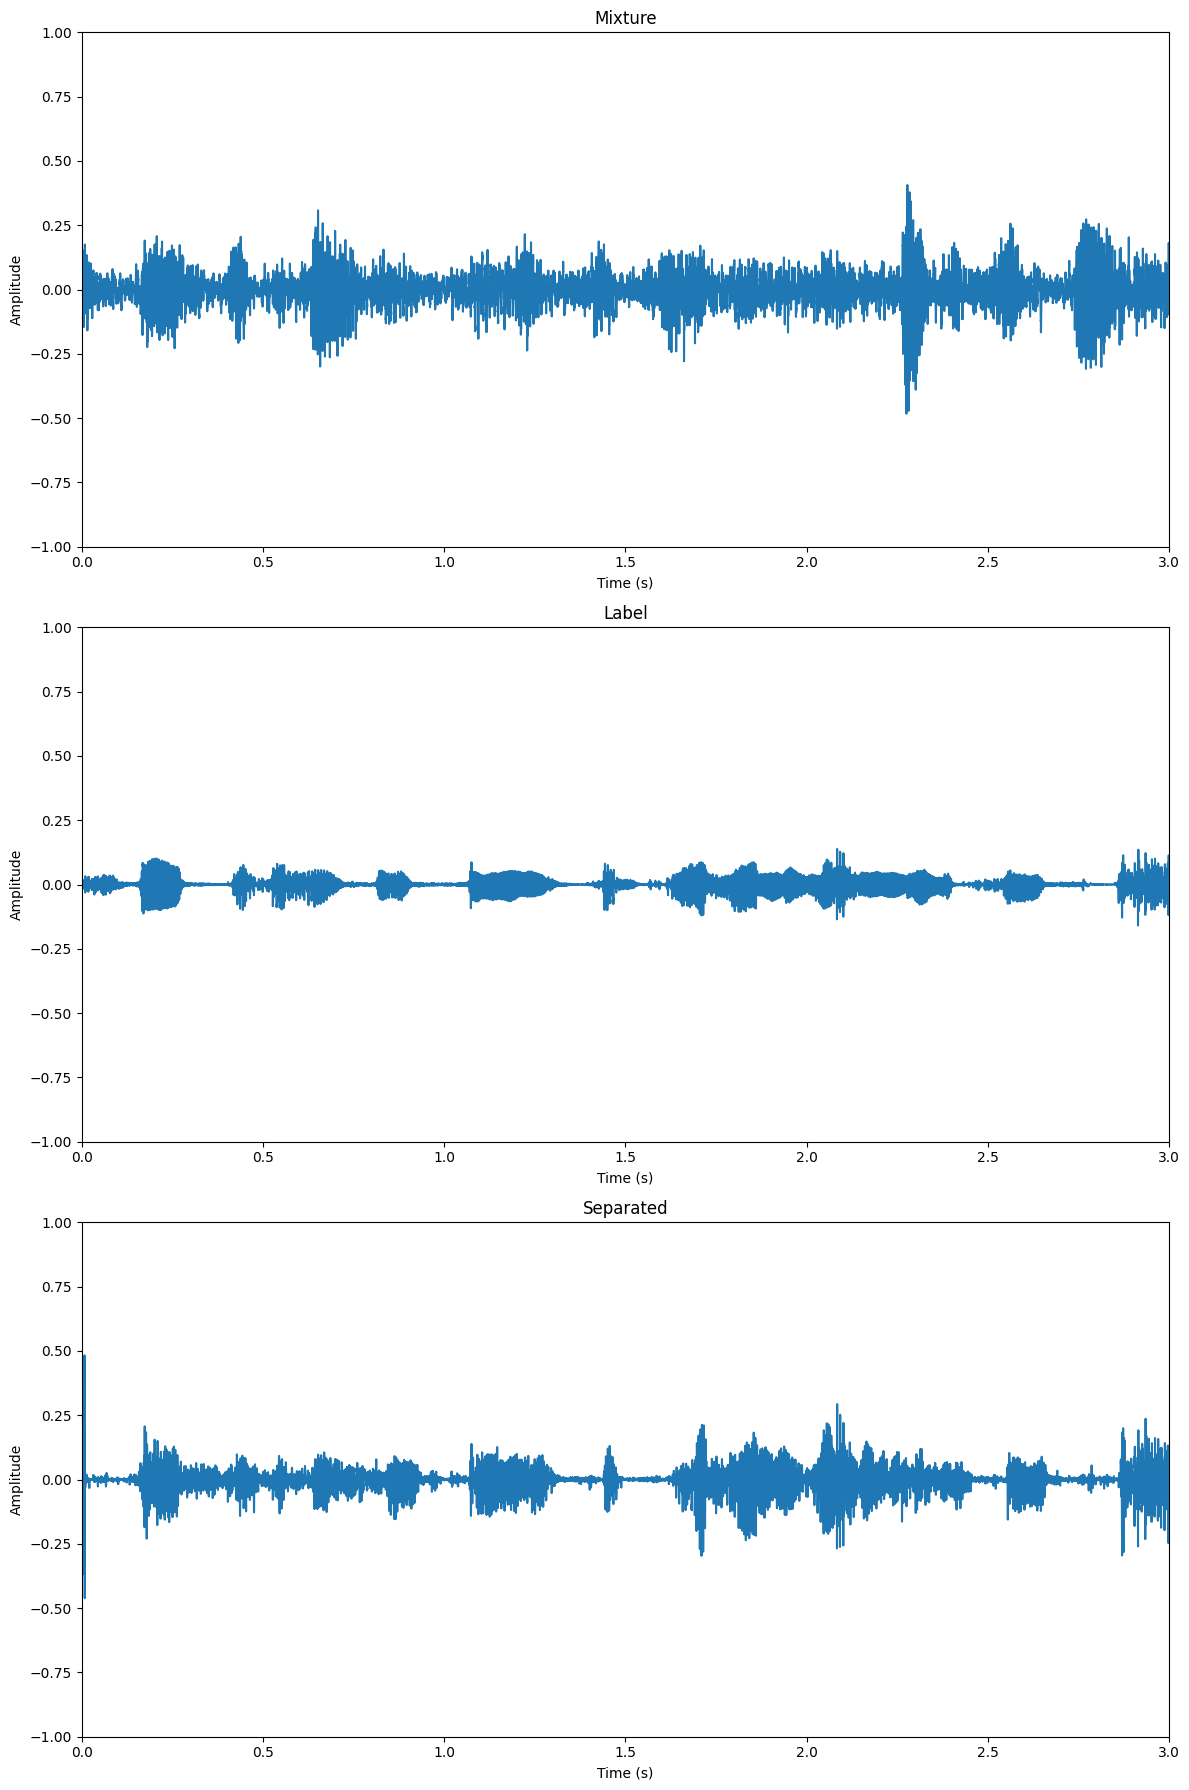

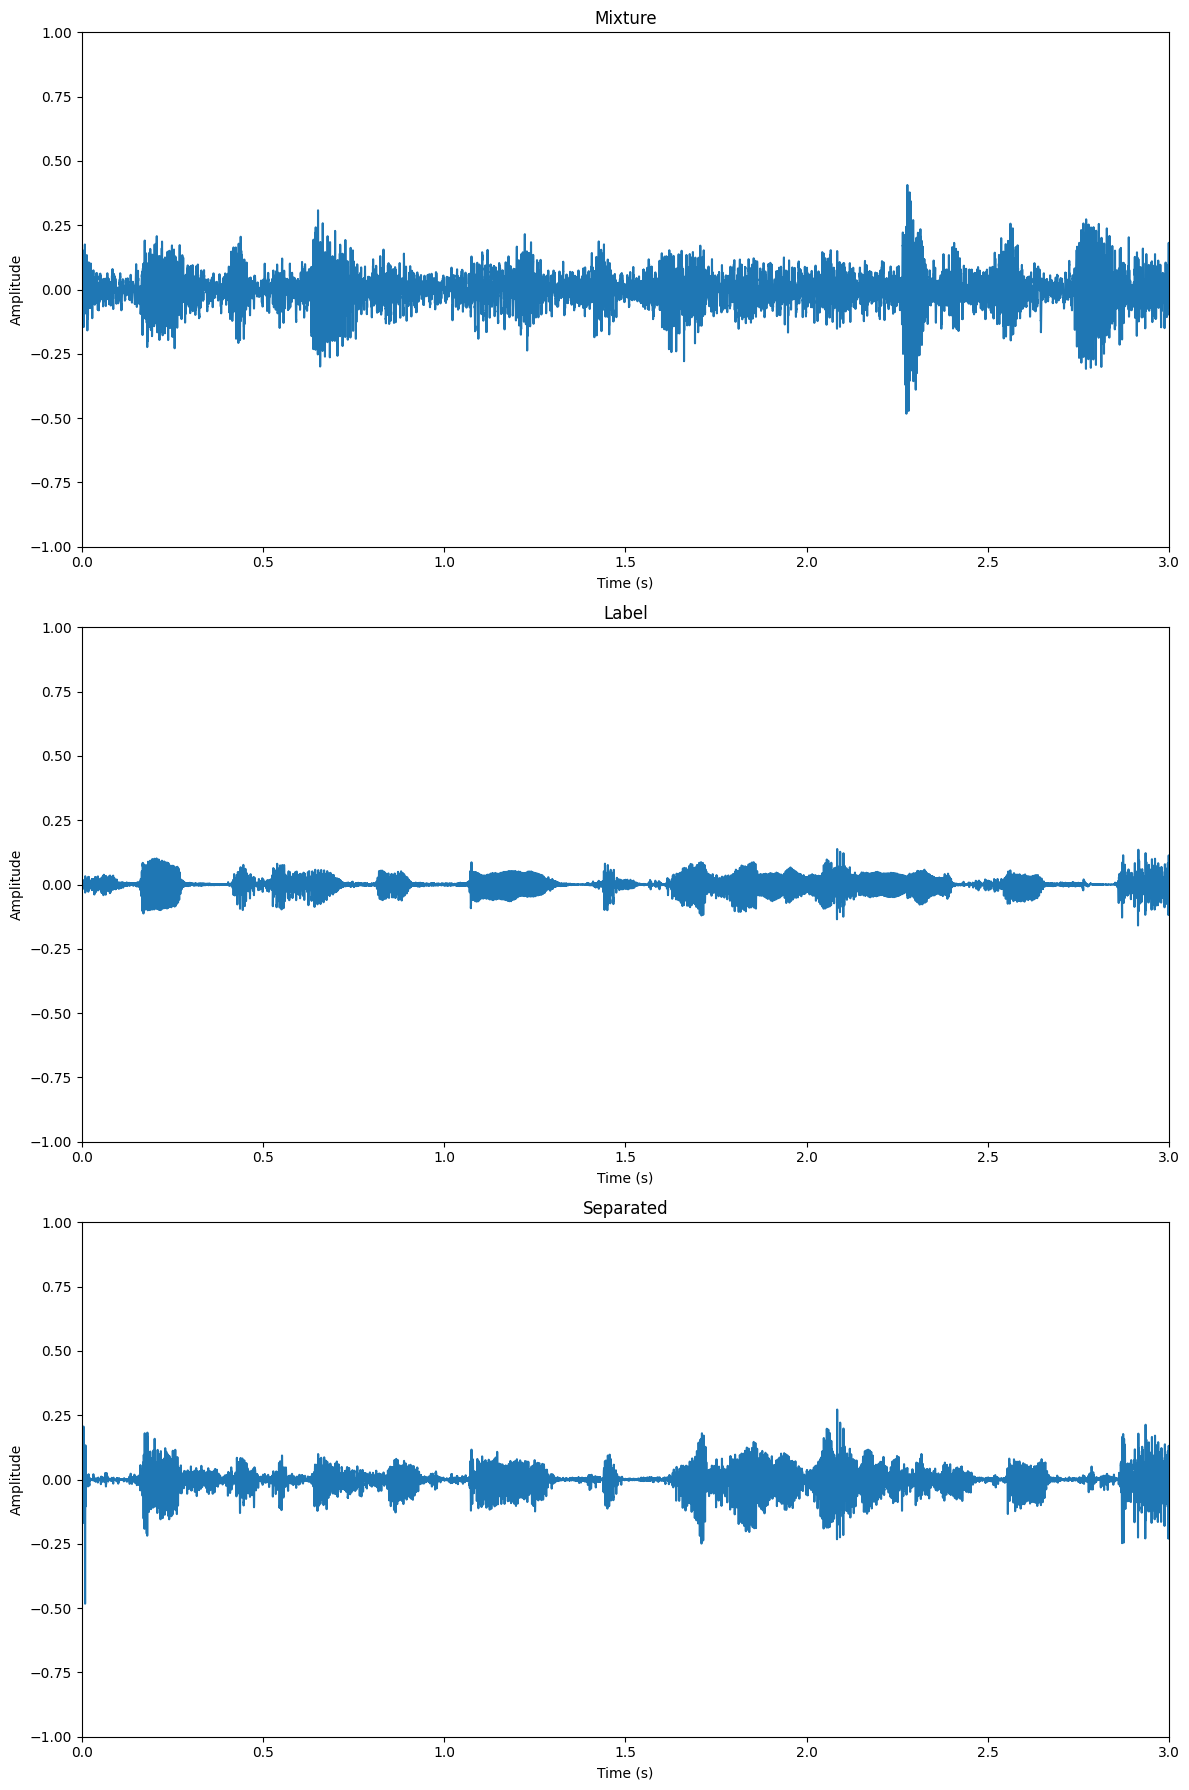

In [10]:
id_name = "s1_260-123440-0010_237-126133-0018"
print("original metrics: ", original_metrics[id_name])
print("autorgress metrics: ", auto_regress_metrics[id_name])
plot_snd(id_name, original_savepath)

plot_snd(id_name, autoregress_savepath)

In [13]:
def plot_snd(data_name, original_savepath, autoregress_savepath):
    import scipy.io.wavfile as wavfile 
    import soundfile as sf
    from IPython.display import Audio, display 
    wavpaths = glob.glob(f"{original_savepath}/*{data_name}*MIX.wav")
    mix_wavpath = wavpaths[0]
    source_wavpath = glob.glob(f"{original_savepath}/*{data_name}*SOURCE.wav")[0]
    sep_wavpath_orig = glob.glob(f"{original_savepath}/*{data_name}*s.wav")[0]
    sep_wavpath_regresse = glob.glob(f"{autoregress_savepath}/*{data_name}*s.wav")[0]
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 2, 1)
    plt.title('Mixture')
    mix_wav, sr = sf.read(mix_wavpath)
    plt.plot(np.arange(0, mix_wav.shape[0])/sr, mix_wav)
    plt.xlim(0, mix_wav.shape[0]/sr)
    plt.ylim(-1, 1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    display(Audio(mix_wav, rate=sr))
    
    plt.subplot(2, 2, 2)
    plt.title('Label')
    src_wav, sr = sf.read(source_wavpath)
    plt.plot(np.arange(0, src_wav.shape[0])/sr, src_wav)
    plt.xlim(0, src_wav.shape[0]/sr)
    plt.ylim(-1, 1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    display(Audio(src_wav, rate=sr))
    # plot the original separated audio
    plt.subplot(2, 2, 3)
    plt.title('Separated Baseline')
    sep_wav, sr = sf.read(sep_wavpath_orig)
    plt.plot(np.arange(0, sep_wav.shape[0])/sr, sep_wav)
    plt.xlim(0, sep_wav.shape[0]/sr)
    plt.ylim(-1, 1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    display(Audio(sep_wav, rate=sr))

    plt.subplot(2, 2, 4)
    plt.title('Separated Autoregressive')
    sep_wav, sr = sf.read(sep_wavpath_regresse)
    plt.plot(np.arange(0, sep_wav.shape[0])/sr, sep_wav)
    plt.xlim(0, sep_wav.shape[0]/sr)
    plt.ylim(-1, 1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    display(Audio(sep_wav, rate=sr))
    plt.tight_layout()

original metrics:  [1.2499935626983645, 8.660264015197754, 0.8284778790689061]
autorgress metrics:  [1.2499935626983645, 8.892667770385742, 0.8411117646109193]


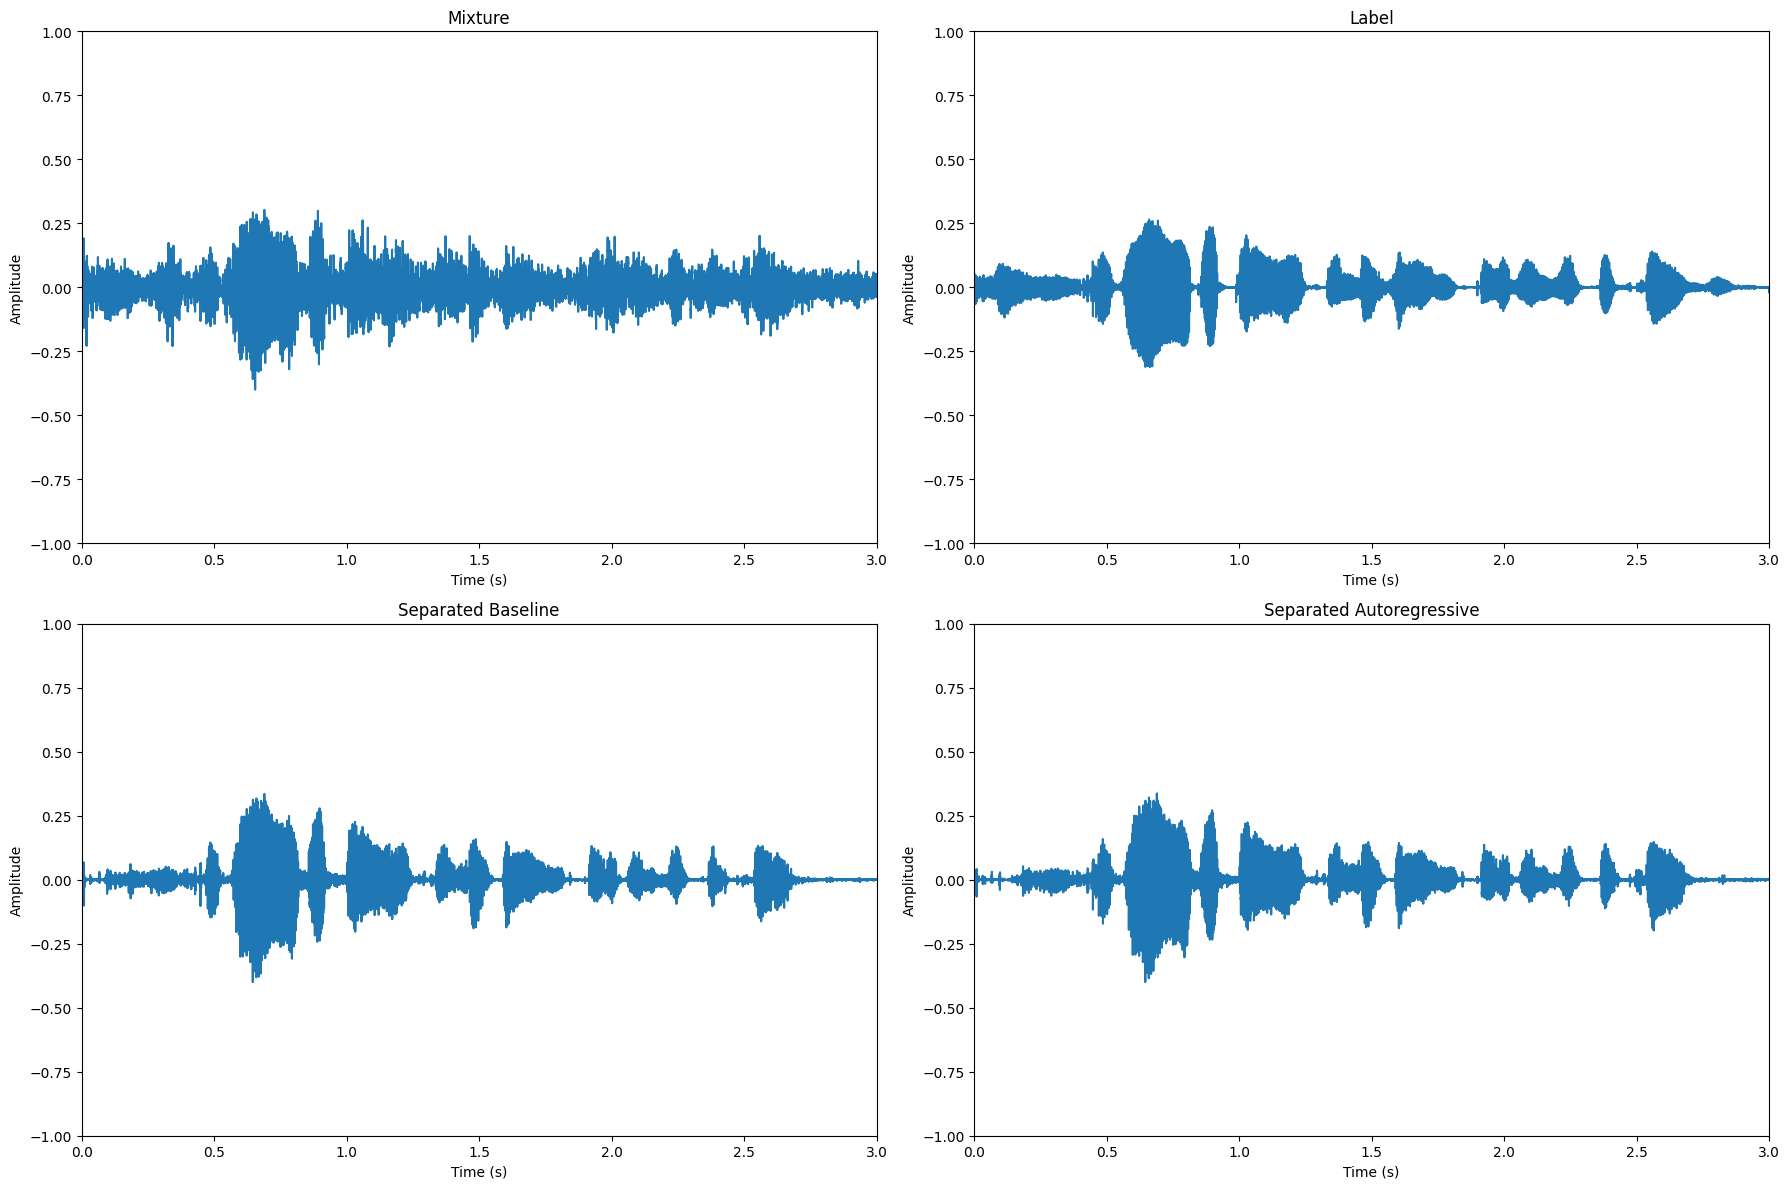

In [16]:
id_name = "s1_237-126133-0003_2830-3980-0028"
print("original metrics: ", original_metrics[id_name])
print("autorgress metrics: ", auto_regress_metrics[id_name])
plot_snd(id_name, original_savepath, autoregress_savepath)
